In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [2]:
#Импортируем библиотеку pandas
import pandas as pd
#Импортируем библиотеку pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [3]:
#Считаем данные из csv-файла в датафрейм и сохраним в переменную df
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [4]:
#Выведем общую информацию и первые 15 строк массива.
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

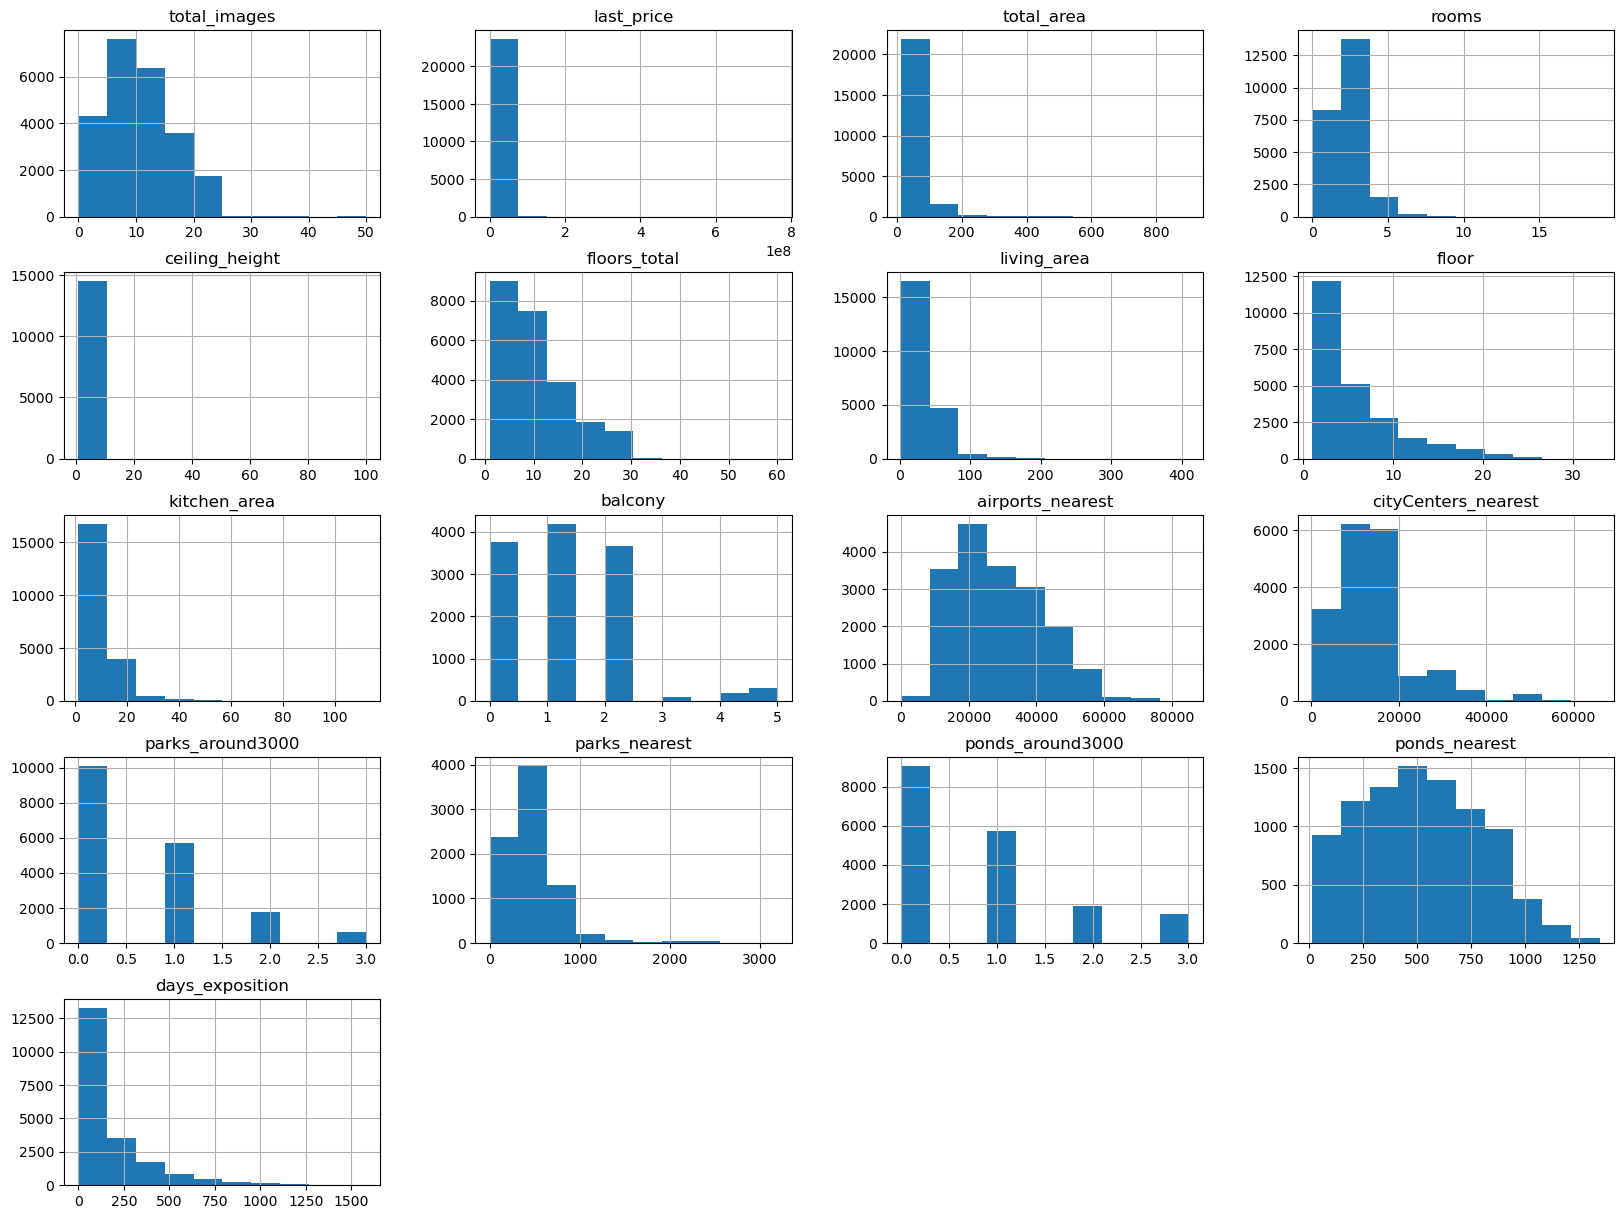

In [5]:
#Построим гистограммы
df.hist(figsize=(20,15))

### Предобработка данных

In [6]:
#Посмотрим количество пропусков по каждому столбцу
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df.duplicated().sum()

0

Видим большое количество пропусков. Для проведения исследования нам не потребуются все атрибуты. Такие столбцы как airports_nearest, parks_nearest, ponds_nearest, ponds_around3000, parks_around3000 - мы не будем трогать, так как в расчетах эти значения не будут участвовать.

#### Заполним пустые значения

In [8]:
#Заменим название столбца
df=df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [9]:
#Отработает пропуски с булевыми значениями
df['is_apartment']=df['is_apartment'].fillna(value=False)

**Поработаем с выбросами**

В выборке есть одна уникальная квартира - равных ей нет. Чтобы она не искажала результаты, мы ее удалим.

In [10]:
#Сделаем срез, чтобы найти квартиру-аномалию
df.query('rooms >= 10 and total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,False,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [11]:
#Удалим строку с квартирой стоимость 420 млн.
df = df.query('total_area != 900')
df.query('rooms >= 10 and total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [12]:
#Удалим строку с квартирой с подозрительно низкой стоимостью 12 190.
df = df.query('total_area != 900')
df.query('rooms >= 10 and total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Найдем и удалим выбросы в значениях высот полотков

In [13]:
#Посмотрим какие есть аномалии
df[['ceiling_height']].value_counts()

ceiling_height
2.50              3515
2.60              1646
2.70              1574
3.00              1112
2.80               992
                  ... 
3.88                 1
3.93                 1
3.98                 1
4.06                 1
100.00               1
Length: 183, dtype: int64

In [14]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,False,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [15]:
#Посчитаем сколько в базе квартир с потолками выше 4м
len(df.query('ceiling_height > 4'))

75

<AxesSubplot:>

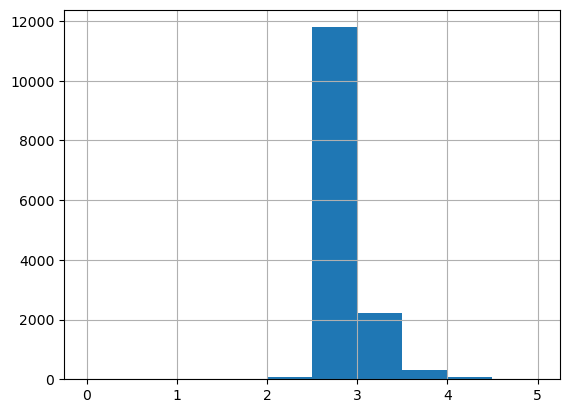

In [16]:
#Посмотрим как распределяются значения в столбце ceiling_height
df['ceiling_height'].hist(range=(0,5))

In [17]:
#Избавимся от выбросов и узнаем медианное значение
df = df.loc[df['ceiling_height'] < 4]
df['ceiling_height'].median()


2.65

In [18]:
#Заполним пропуски медианым знаечнием
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

Среди значений ceiling_height видим высоту потолка 100м - это явно ошибка ввода. По гистограме, где мы смотрим значения не более 5м, очевидно, что все значения лежат в промежутке от 2,5 до 3,5м - что является норной. Объявлений с высотой полотка свеше 4м всего 75 - мы решили их удалить. Пропуски заполнили значением по медиане. 

In [19]:
#Все значения допустимы, если учитывать, что объявления о продаже комнат в коммуналках, например.
df.describe()    

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14389.000000,1.438900e+04,14389.000000,14389.000000,14389.000000,14380.000000,13600.000000,14389.000000,13464.000000,7203.000000,11446.000000,11463.000000,11464.000000,5231.000000,11464.000000,5664.000000,11963.000000
mean,10.308778,6.693211e+06,61.419440,2.131003,2.717237,10.201460,35.380730,5.633053,10.517391,1.359850,28839.254412,14118.337346,0.634770,477.044542,0.770150,519.029661,189.801471
std,5.614486,9.183635e+06,35.104971,1.089543,0.250571,6.200026,21.820751,4.619950,5.891545,1.067252,12644.546367,8738.006332,0.817446,320.783326,0.947885,280.476234,228.164568
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,3.000000,0.000000,16.000000,1.000000
25%,6.000000,3.550000e+06,41.000000,1.000000,2.510000,5.000000,19.100000,2.000000,7.000000,1.000000,18504.250000,9170.500000,0.000000,285.000000,0.000000,287.000000,45.000000
50%,10.000000,4.850000e+06,53.000000,2.000000,2.650000,9.000000,30.700000,4.000000,9.000000,1.000000,26785.500000,12995.000000,0.000000,448.000000,0.000000,504.000000,103.000000
75%,15.000000,7.000000e+06,71.000000,3.000000,2.800000,14.000000,43.100000,7.000000,12.000000,2.000000,37131.000000,16053.500000,1.000000,602.000000,1.000000,733.000000,246.000000
max,35.000000,3.300000e+08,631.200000,16.000000,3.980000,60.000000,409.000000,30.000000,100.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Среди значений мы видим аномально большое значений в графе floors_total = 60. Проверим его отдельно. Также есть аномально высокое значение в графе days_exposition - данное значение обработаем отдельно.

Прочие данные в норме. 
Видим, что в столбцах нет значений равных 0. Применим это значения вместо NaN

In [20]:
#Заменим значения, где за пропуски справедливо принять 0.
df[['balcony', 'days_exposition', 'living_area', 'kitchen_area', 'city_centers_nearest']] = df[['balcony', 'days_exposition', 'living_area', 'kitchen_area', 'city_centers_nearest']].fillna(0)

In [21]:
#Отсутствующих значений в locality_name и floors_total очень мало, можно их удалить без вреда для исследования.
df = df.dropna(subset=['locality_name', 'floors_total'])

In [22]:
#Посмотрим какие есть значения в столбце locality_name
df['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок городского типа Красный Бор',
       'посёлок Мурино', 'Сертолово', 'Гатчина', 'поселок Мурино',
       'Ломоносов', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Колпино', 'Кировск', 'деревня Новое Девяткино',
       'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'село Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'по

In [23]:
#Заменим повторяющиеся значения в столбце locality_name - избавимся от всех неявных дубликатов.
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок') 
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'поселок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок Красный Бор',
       'поселок Мурино', 'Сертолово', 'Гатчина', 'Ломоносов',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       'деревня Новое Девяткино', 'поселок Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок Кузьмоловский', 'деревня Куттузи', 'поселок Торковичи',
       'поселок Шушары', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'деревня Старая', 'деревня Лесколово',
       'поселок Новый Свет', 'село Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово', 'поселок Рощино',
       'Сясьстрой', 'Кириши', 'Луга', 'Волосово', 'поселок Оредеж',
       'поселок Бугры', 'поселок Металлострой', 'поселок Молодёжное',
       'Тих

In [24]:
#Проверим, что избавились от всех пропусков в необходимых столбцах.
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        2940
city_centers_nearest       0
parks_around3000        2922
parks_nearest           9144
ponds_around3000        2922
ponds_nearest           8718
days_exposition            0
dtype: int64

In [25]:
df['last_price'].sort_values()

8793         12190.0
16219       450000.0
10782       490000.0
4405        500000.0
1358        550000.0
            ...     
13749    240000000.0
16461    245000000.0
22831    289238400.0
15651    300000000.0
1436     330000000.0
Name: last_price, Length: 14367, dtype: float64

In [26]:
df.query('last_price > 100000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,False,...,50.0,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1188,20,118000000.0,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.7,3,False,...,22.0,1.0,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,False,...,40.0,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,0.0,7,False,...,0.0,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984000.0,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.0,7,False,...,20.0,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
4996,20,124000000.0,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.2,2,False,...,20.0,0.0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0
7674,20,131000000.0,380.0,2016-09-23T00:00:00,5,3.90,6.0,150.0,4,False,...,0.0,1.0,Санкт-Петербург,25801.0,4504.0,2.0,161.0,1.0,635.0,901.0
12674,16,140000000.0,241.0,2015-07-24T00:00:00,5,3.00,5.0,0.0,4,False,...,0.0,0.0,Санкт-Петербург,23512.0,3503.0,3.0,413.0,3.0,83.0,399.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,False,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,0.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,False,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0


In [27]:
#Удалим строку объекта с неправдопадобно низкой стоимостью 12 190.
df = df.query('last_price != 12190')

Проверим аномально высокое значение floors_total = 60

In [28]:
#Посмотрим, сколько строк со значением 60 имеет датасет.
df.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


Значение floors_total = 60 имееть лишь одна квартира. Учитывая стоимость, общую площадь и этаж самой квартиры - предположу что, здесь могла быть допущена ошибка при вводе: не 60, а 6. Заменим данное значение.

In [29]:
#Заменим 60 на 6
df['floors_total'] = np.where((df.floors_total == 60), 6, df.floors_total)

In [30]:
#Проверим, что значение заменилось.
df['floors_total'].describe()

count    14366.000000
mean        10.198107
std          6.184033
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         52.000000
Name: floors_total, dtype: float64

#### Заменим тип данных

In [31]:
#Изменим у столбцов 'last_price', 'total_area' тип данных на числовой(int)
df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'city_centers_nearest']] = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'city_centers_nearest']].astype(int)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

#### Вывод: 
Дубликатов в базе нет, однако пропусков много.

Причин возникновения пропусков несколько. Например:
- человек физически не заполнил графы, например 'балкон' - если их нет в квартире.
- система не нашла значения для столбца 'city_centers_nearest', если точка находится в отдалении от Санкт-Петербурга и для этой точки не задан центр для отсчета расстояния.

Значения с пропусками, которые не участвуют в расчетах мы трогать не стали. Необходимые - заполнили нулевыми значениями. is_apartment - пропуски заменили значениями false. А для ceiling_height взяли медиативное значение по срезу без выбросов. 

Строки с отсутствующими значениями в графах 'locality_name', 'floors_total' мизерно мало, поэтому принято решение их удалить. 

Есть и другие выбросы, но категорий слишком много, чтобы можно было выделить часть с аномалиями и избавиться от нее. Есть лишь одно единственное объявление: с общей площадью 900кв м и стоимостью 420 000 000руб - данный объект является аномальным по многим параметрам - его мы удалили. Так же объект с общей стоимостью 12 190руб: данная цифра не может отображать реальную цену (слишком мала) - это объявление мы тоже удалили.

Убрали неявные дубликаты в столбце 'locality_name'. 

Для будующих расчетов нам потребовалось изменить тип данных в столбцах 'last_price', 'total_area', 'living_area', 'kitchen_area', 'city_centers_nearest' с float на int. И по той же причины мы изменили тип 'first_day_exposition' на datetime.

### Посчитаем и добавим в таблицу новые столбцы

In [32]:
#Расчитаем стоимость одного квадратного метра
df['price_per_m'] = df['last_price'] / df['total_area']

In [33]:
#Присвоим дням недели цифровое значение
df['weekday'] = df['first_day_exposition'].dt.weekday

In [34]:
#Добавим месяц публикации
df['month'] = df['first_day_exposition'].dt.month

In [35]:
#Добавим год публикации
df['year'] = df['first_day_exposition'].dt.year

In [36]:
#Добавим категории для значения этажей
def floor_num(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

df['floor_num'] = df.apply(floor_num, axis = 1)
    

In [37]:
#Переведем в значении city_centers_nearest метры в километры и округлим до целых значений
df['city_centers_km'] = (df['city_centers_nearest'] / 1000).astype(int)

In [38]:
#Проверим, что все новый столбцы добавились
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,weekday,month,year,floor_num,city_centers_km
0,20,13000000,108,2019-03-07,3,2.70,16.0,51,8,False,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другой,16
4,2,10000000,100,2018-06-19,2,3.03,14.0,32,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8
9,18,5400000,61,2017-02-26,3,2.50,9.0,43,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15
10,5,5050000,39,2017-11-16,1,2.67,12.0,20,3,False,...,310.0,2.0,553.0,137.0,129487.179487,3,11,2017,другой,13
13,20,3550000,42,2017-07-01,2,2.56,5.0,27,5,False,...,294.0,3.0,298.0,366.0,84523.809524,5,7,2017,последний,33


### Проведем исследовательский анализ данных

#### Общее изучение параметров объектов

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'weekday'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

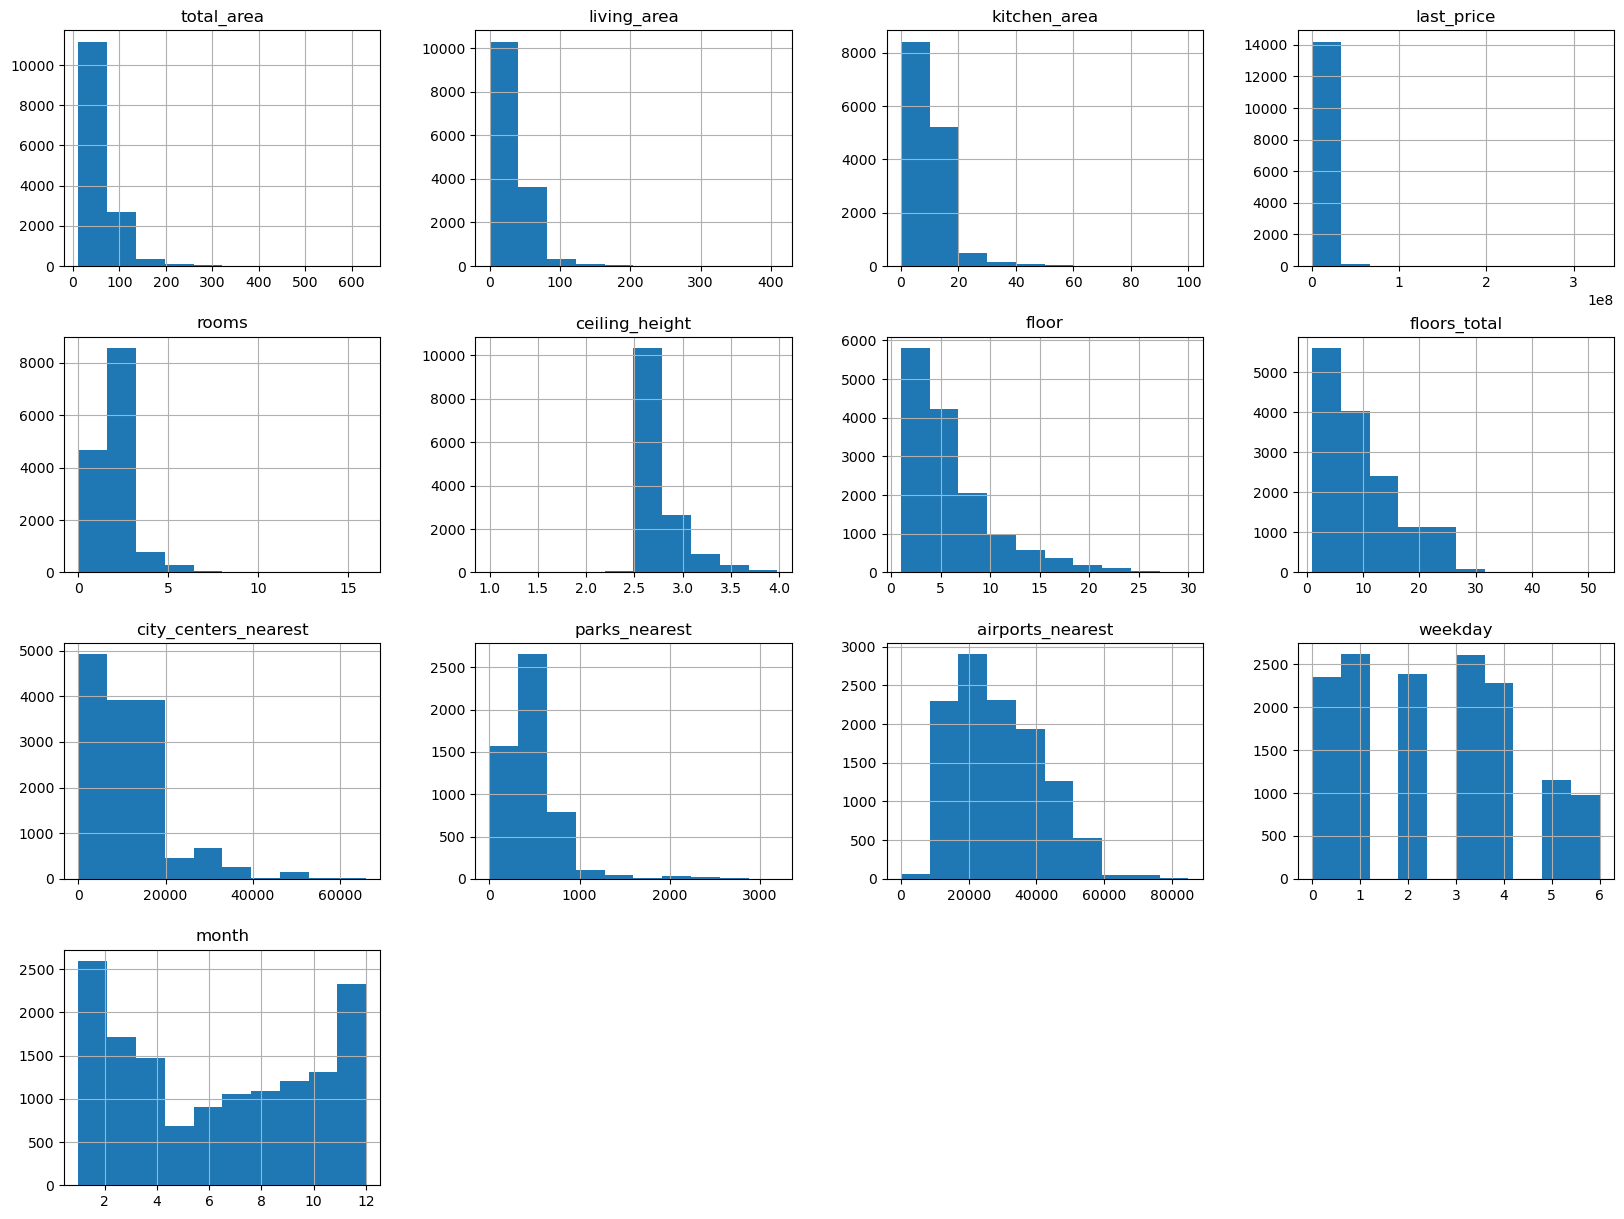

In [39]:
#Построим гистограмы параметров объектов
df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_num', 'floors_total', 'city_centers_nearest', 'parks_nearest', 'airports_nearest', 'weekday', 'month']].hist(figsize=(20,15))

На рынке мы видим разнообразие предложений. 
Однако подавляющее количество объектов имеют площадь до 80кв.м, с жилой площадью в 45кв.м и кухнями 10кв.м. Разрыв площадей тем не менее большой: представлены объекты и по 100, 200 и даже 900кв.м.

Много предложений на рынке на 2,3 комнатные квартиры со стандартными потолками в 2,5 - 3м. Высотных многоэтажек представлено мало, чаще это дома 10-12-этажные. В продаже квартиры ниже 5 этажа встречаются чаще, чем этажами выше. 

Почти половина предложений находятся в 7 км от центра, предложений дальше 20км от центра Санкт-Петербурга мало. Парк, если он есть рядом, будет в радиусе км. Аэропорт расположен далеко от города: расстояние от объектов 10-40км, реже 40-60км. 

По данным мы можем наблюдать сезонность: предложений с ноября по февраль в разы больше, чем с мая по сентябрь. Это можно объяснить тем, что летом многие уезжают отдыхать из города и оставляют дела на осень-зиму. Объявления публикуют в будни дни, в выходные - меньше. Можно предположить, что выгоднее выставить объявление в будни, чтобы в выходной день были просмотры. 

#### Изучим, как быстро продавались квартиры

In [40]:
#Посмотрим описание по столбцу days_exposition
df['days_exposition'].describe()

count    14366.000000
mean       157.650494
std        219.647221
min          0.000000
25%         17.000000
50%         71.500000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

По данным мы видим аномальные значения до 1580 дней, что составляет более 4 лет. Такие данные могли уже устареть. 75% базы лежит в значении до 200 дней - эти значения и изучим. 

<AxesSubplot:>

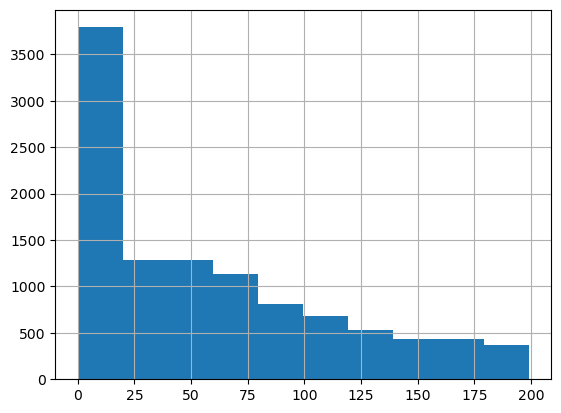

In [41]:
#Поближе посмотрим распредеделние закрытия сделки до 200 дней.
days_exposition = df.query('days_exposition < 200')
days_exposition['days_exposition'].hist()

In [42]:
print('Средняя продолжительность размещения:', round (days_exposition['days_exposition'].mean()), 'дней')
print('Средняя медиана продолжительности размещения:', round (days_exposition['days_exposition'].median()), 'дней')

Средняя продолжительность размещения: 57 дней
Средняя медиана продолжительности размещения: 45 дней


В среднем объект продается от 2 до 3 месяцев. 

Мы видим, что есть публикации, которые закрываются в тот же день, но это не может говорить нам о продаже день в день. Справедливо считать быстрые продажы - 20 дней, и долгими более 200 дней. 

#### Факторы влияющие на общую (полную) стоимость объекта

0.6896841048324908

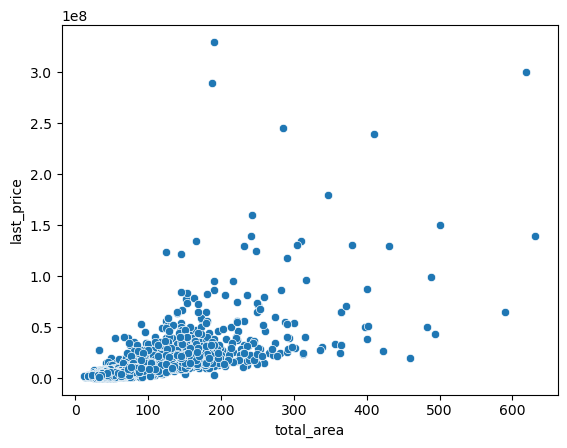

In [43]:
#Найдем зависимость стоимости от площади объекта.
seaborn.scatterplot(x=df['total_area'], y=df['last_price'])
df['total_area'].corr(df['last_price'])

Зависимость очевидна. Чем больше площадь, тем выше цена. Но гистограмма нам показывает, что это правило работает не всегда.

0.5195121578011838

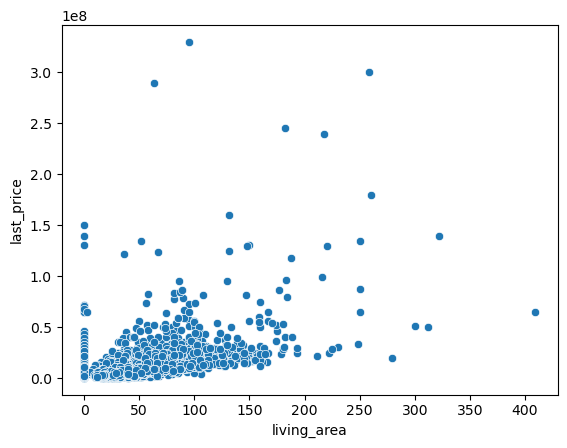

In [44]:
#Найдем зависимость стоимости от жилой площади объекта.
seaborn.scatterplot(x=df['living_area'], y=df['last_price'])
df['living_area'].corr(df['last_price'])

Небольшая зависимость есть. Чем больше жилая площадь, тем чуть больше стоимость.

0.44356455970322795

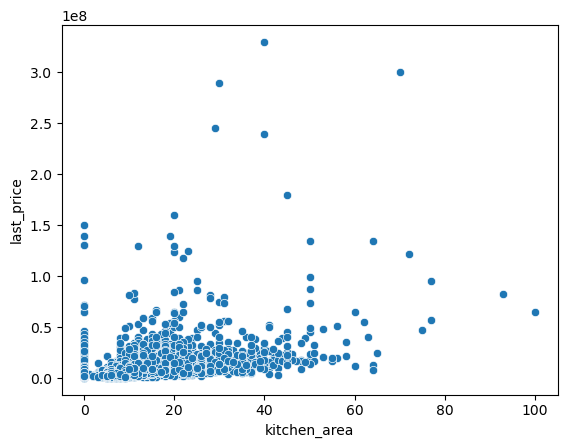

In [45]:
#Найдем зависимость стоимости от площади кухни объекта.
seaborn.scatterplot(x=df['kitchen_area'], y=df['last_price'])
df['kitchen_area'].corr(df['last_price'])

Также наблюдаем небольшую зависимость: чем больше кухня, тем чуть больше стоимость квартиры.

0.3934927713461918


<AxesSubplot:xlabel='rooms'>

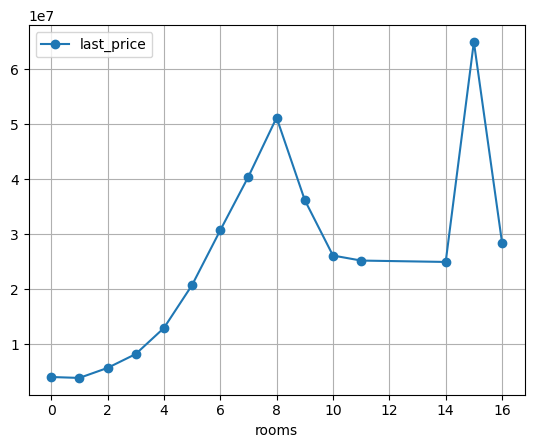

In [46]:
#Зависимость цены от количества комнат
print(df['last_price'].corr(df['rooms']))
df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-')

Наблюдаем зависимость в выборке до 8 комнат: чем больше комнат, тем выше стоимость.

0.03168857031080884

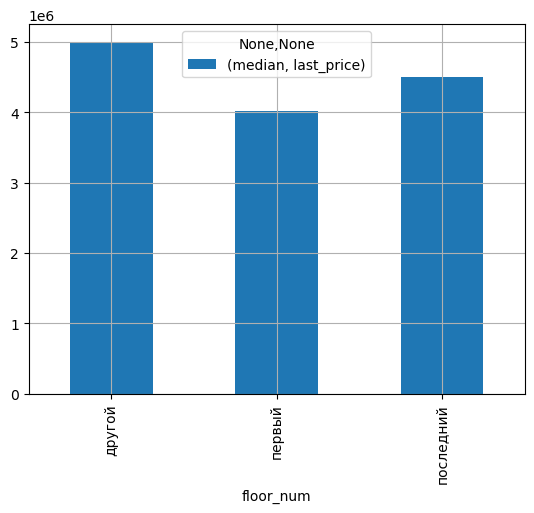

In [47]:
#Зависимость цены от этажа
df.pivot_table(index='floor_num', values='last_price', aggfunc=['median']).plot(grid=True, kind='bar')
df['floor'].corr(df['last_price'])

Квартиры на первом этаже дешевле на 10% квартир на последних этажах и на 20% дешевле, чем на любом другом этаже.

-0.018184794397893004

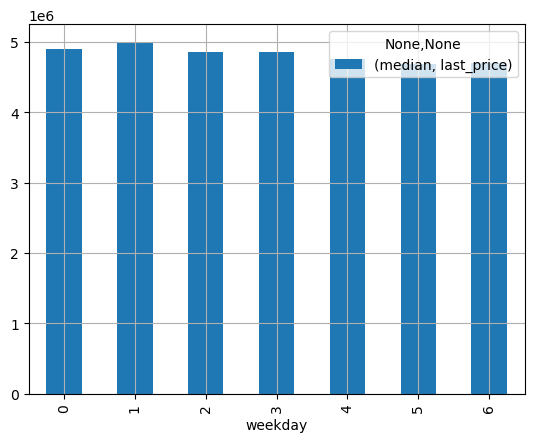

In [48]:
#Зависимость цены от дня недели
df.pivot_table(index='weekday', values='last_price', aggfunc=['median']).plot(grid=True, kind='bar')
df['weekday'].corr(df['last_price'])

Зависимости между стоимость и днем недели публикации объявления нет.

-0.0020500418495486197

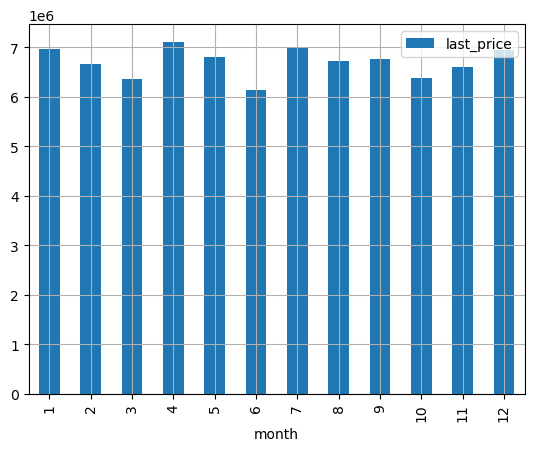

In [49]:
#Зависимость цены от месяца публикации
df.pivot_table(index='month', values='last_price').plot(grid=True, kind='bar')
df['month'].corr(df['last_price'])

Наименьшую стоимость объектов мы наблюдаем в марте, июне и октябре, при чем в июне фиксируется самые низкие цены в году. 

Высокие значения видим в январе, апреле, июле и декабре.

-0.051522432837165934

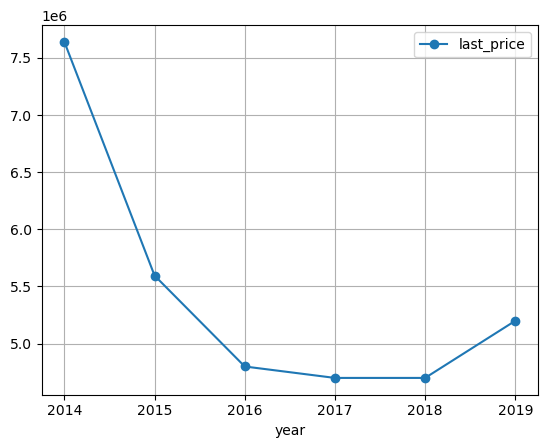

In [50]:
#Зависимость цены от года продажи
df.pivot_table(index='year', values='last_price', aggfunc='median').plot(grid=True, style='o-')
df['year'].corr(df['last_price'])

После 2014г года цена на недвижимость стала падать и с 2016г цены стабилизировались. 

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [51]:
high_low_price = df.groupby('locality_name')['price_per_m'].agg(['count','mean']).sort_values(by='count', ascending=False)[:10]
display(high_low_price[high_low_price['mean'] == high_low_price['mean'].max()])
display(high_low_price[high_low_price['mean'] == high_low_price['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,10005,115668.292876


,count,mean
locality_name,,
Всеволожск,270,67498.441204


ОБъекты с самой высокой стоимостью кв.м в Санкт-Петербурге, а самая низкая стоимость кв.м в Всеволожске.

#### Вычислим среднюю стоимость одного км в Санкт-Петербурге.

In [52]:
#узнаем среднюю стоимоть км.
round (df['last_price'].mean()/df['city_centers_km'].mean())

616326

<AxesSubplot:xlabel='city_centers_km'>

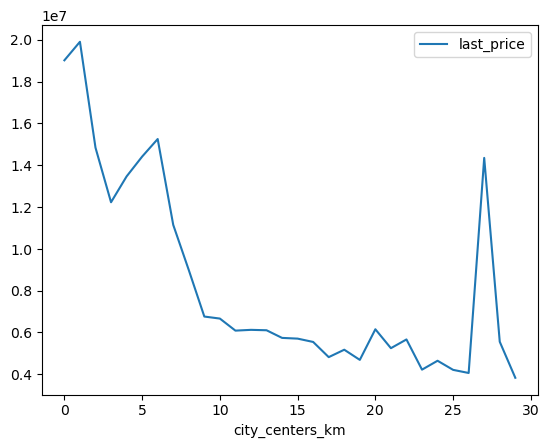

In [53]:
#Построим гистограмму зависимости 
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_km', values='last_price').plot()

Средняя стоимость одного км - 616 290руб. Видим прямую зависимость: чем ближе к центру, тем выше стоимость квартиры.

### Общий вывод

Мы изучили объекты недвижимости представленные к продаже с 2014г по 2019г в Санкт-Петербурге и ленинградской области. 

Рынок Санкт-Петербурга имеет свои особенности, которые мы и увидели в исследовании. Например большое количество предложений с 6, 8 и даже 12 комнатами. Очевидно, что это бывшие коммуналки, которые могут продаваться как отдельные комнаты (поэтому здесь мы видим площадь кухонь 2кв.м, например), так и коммуналки целиком - поэтому видим площади квартир 200, 300, 600 и даже 900кв.м.

Данные показали, что застройка в Санкт-Петербурге, особенно в центральном районе, невысокая: больше половины предложений располагаются не выше 5 этажа. Высоток в 25 этажей мало, а вот дома в 10-12 этажей уже встречаются чаще. И это логично, ведь в центральном районе, где больше всего предложений, мало новостоя. К слову там же, в радиусе 7 км от центра, расположились самые дорогие объекты,где средняя стоимость - 115 656руб за метр. Если говорить в общем о цене, то после резко падения цен в 2014 году, к 2016 значения выровнились и следующие три года почти не менялись.

Рынок недвижимости имеет сезонность: в разы больше предложений с ноября до февраль, чем с мая по сентябрь - пора отпусков и долгих поездок загород. Также и с днями недели: больше половины объявлений публикуют в будние дни. Средняя продолжительность продажи 2-3 месяца. 

Особенности застройки Санкт-Петербурга не позволили выявить очевидные зависимости цены от какого-либо параметра. Безусловно чем больше площадь, тем и цена будет выше. Но и здесь мы увидели исключения. На цену вероятно врияет и расположение и состояние квартиры и много других признаков, которые стоит исследовать вкупе. 